# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

# Separación de la muestra, validación cruzada, selección de estadísticos de capacidad predictiva

-----

# IMPORTANTE: CAMBIAR NOMBRES TRAIN Y TEST PARA RESERVAS Y CANCELACIONES

# AutoARIMA

## Analisis Serie Reservas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

#obtain hierarchical dataset
from datasetsforecast.hierarchical import HierarchicalData

# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

In [3]:
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,452
2017-08-13,442
2017-08-20,465
2017-08-27,472
2017-09-03,248


In [4]:
log_df_w_r = pd.read_csv('df_reservas_LOG.csv')
log_df_w_r = log_df_w_r.rename(columns={'Unnamed: 0': 'ArrivalDate'})
log_df_w_r['ArrivalDate'] = pd.to_datetime(log_df_w_r['ArrivalDate'])
log_df_w_r = log_df_w_r.set_index('ArrivalDate')
log_df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,6.113682
2017-08-13,6.091310
2017-08-20,6.142037
2017-08-27,6.156979
2017-09-03,5.513429


In [5]:
#Dividir el dataset

# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

110 4


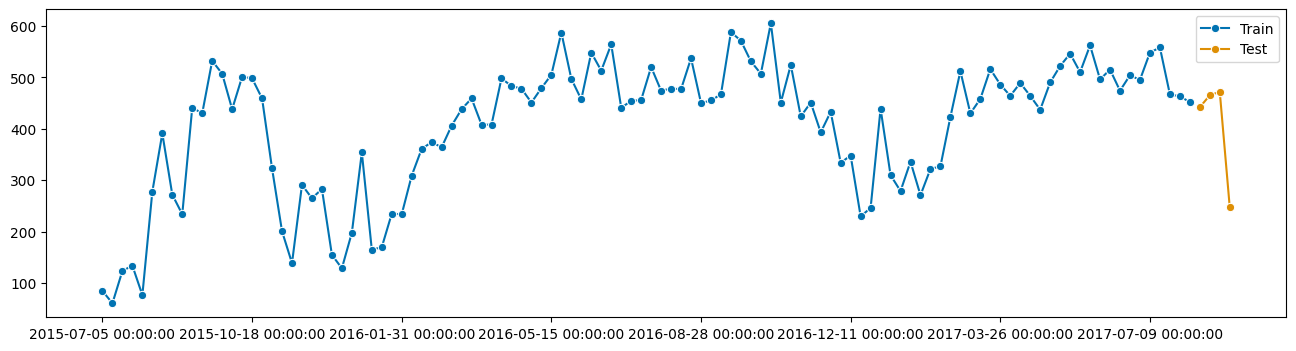

In [6]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_r, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_r, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [7]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [8]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [9]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

KeyboardInterrupt: 

In [ ]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

In [ ]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

In [ ]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [ ]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [ ]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

In [ ]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

In [ ]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

In [ ]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Reservas", "Reservas pred", "Reservas REAL"])

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Reservas", "Reservas pred", "Reservas REAL"])

---------

## Analisis Serie Cancelaciones

In [ ]:
df_w_c = pd.read_csv('df_cancelaciones.csv')
df_w_c['ArrivalDate'] = pd.to_datetime(df_w_c['ArrivalDate'])
df_w_c = df_w_c.set_index('ArrivalDate')
df_w_c.head()

In [ ]:
log_df_w_c = pd.read_csv('df_cancelaciones_LOG.csv')
log_df_w_c = log_df_w_c.rename(columns={'Unnamed: 0': 'ArrivalDate'})
log_df_w_c['ArrivalDate'] = pd.to_datetime(log_df_w_c['ArrivalDate'])
log_df_w_c = log_df_w_c.set_index('ArrivalDate')
log_df_w_c.head()

In [ ]:
# Separamos train y test- test como esta por semanas quitamos 4

# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
y_train, y_test = temporal_train_test_split(y =df_w_c, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_df_w_c, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [ ]:
# comprobamos cuanto tiempo adelante estamos prediciendo

# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

In [ ]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

In [ ]:
#  Auto ARIMA Model

# Nosotros ajustaremos el modelo con 52 temporadas que son las semanas que tiene un año
forecaster = AutoARIMA(sp=52, suppress_warnings=True)
forecaster.fit(log_y_train)

In [ ]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

In [ ]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

In [ ]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

## Vamos a estudiar el rendimiento de nuestros modelos predictores

In [ ]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [ ]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

In [ ]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

In [ ]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

In [ ]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])

In [ ]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2017 -
plot_series(y_train["2017":], np.exp(log_y_pred),y_test, labels=["Cancels", "Cancels pred", "Cancels REAL"])